In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Custom Churn- ML/TelcomChurn.csv")

In [3]:
#data analysis steps
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe() # giving numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#data cleaning and visualization
df.isna().any() # to identify missing values, no missing values here


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
#replacing objects with categorical values
for feature in df.columns:  # looping through all columns in data set
  if df[feature].dtype=='object':#if data type  of column is object
    df[feature]=pd.Categorical(df[feature])# replace strings with an integer, if strings in data set,error usually coming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#plotting each feature(column)
def hist_value(feature):
  pd.value_counts(feature).plot.bar()
  plt.title(feature.name+'class histogram')
  plt.xlabel('class')
  plt.ylabel('frequency')
  print(feature.value_counts())
  

Male      3555
Female    3488
Name: gender, dtype: int64


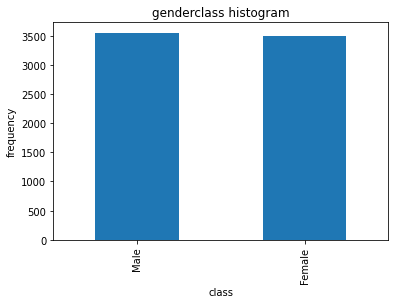

In [11]:
hist_value(df['gender']) # almost equal ratios of male and female

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


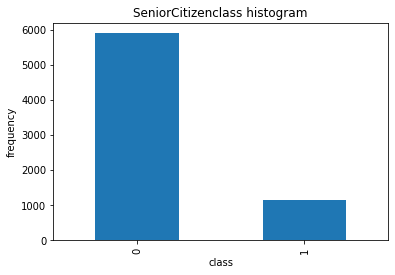

In [12]:
hist_value(df['SeniorCitizen']) #no of senior citizens are less than normal citizens

No     3641
Yes    3402
Name: Partner, dtype: int64


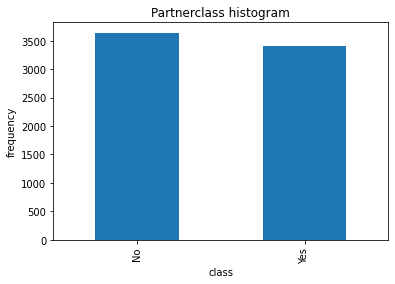

In [13]:
hist_value(df['Partner']) #equal ratios of partners and nonpartners

No     4933
Yes    2110
Name: Dependents, dtype: int64


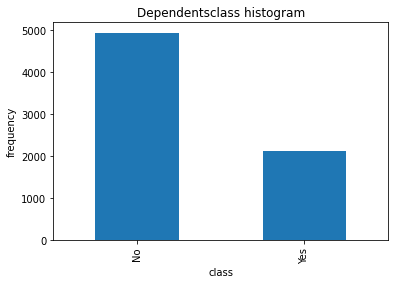

In [14]:
hist_value(df['Dependents']) # no of dependent users are less than non dependent users

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


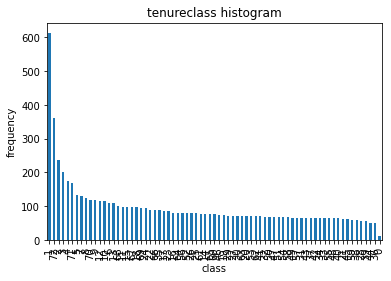

In [15]:
hist_value(df['tenure'])

Yes    6361
No      682
Name: PhoneService, dtype: int64


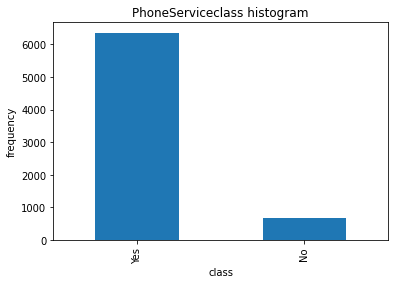

In [16]:
hist_value(df['PhoneService']) #people who dont have phone service are very few

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


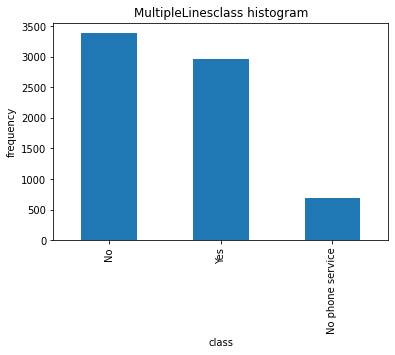

In [17]:
hist_value(df['MultipleLines']) #multiple lines are fewer than normal lines and customers who dont have phone service donot belong to this category

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


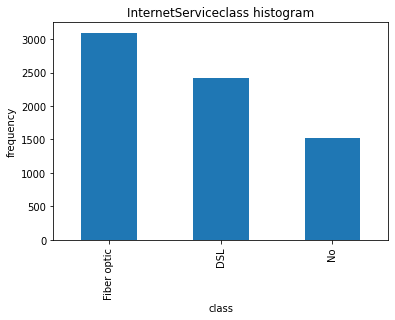

In [18]:
hist_value(df['InternetService']) #fiber optic cable is most common internet service,there is large population which does not have internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


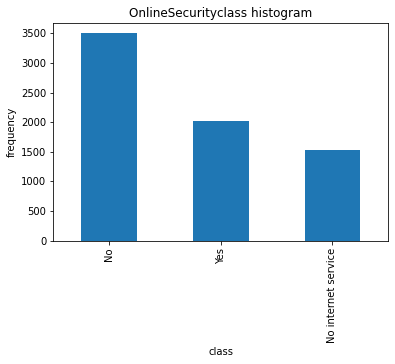

In [19]:
hist_value(df['OnlineSecurity'])#online security is not opted by max customers and customers who dont have internet service donot belong to this category

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


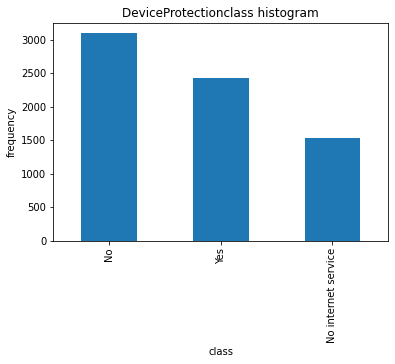

In [20]:
hist_value(df['DeviceProtection']) # device protection donot opted by max customers and customers donot have internet service  donot belong to this category

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


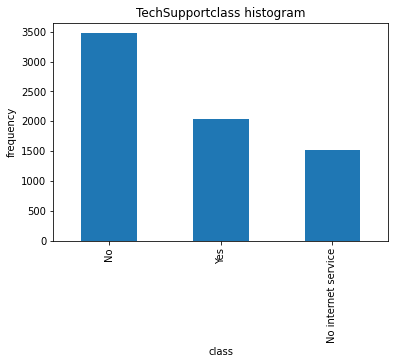

In [21]:
hist_value(df['TechSupport']) #techsupport is not used by max customers and customers who dont have internet service donot belong to this category

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


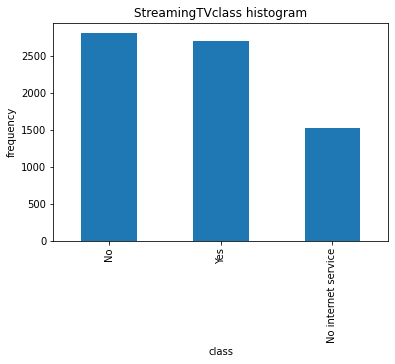

In [22]:
hist_value(df['StreamingTV']) # streaming tv is equiprobable bt customers who have internet service and customers donot have internet service dont belong to category

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


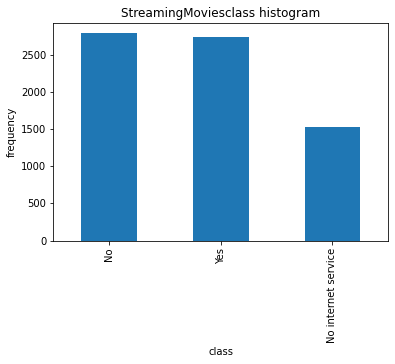

In [23]:
hist_value(df['StreamingMovies']) #streaming movies is equiprobable bt customers who have internet service and customers donot have internet service dont belong to category

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


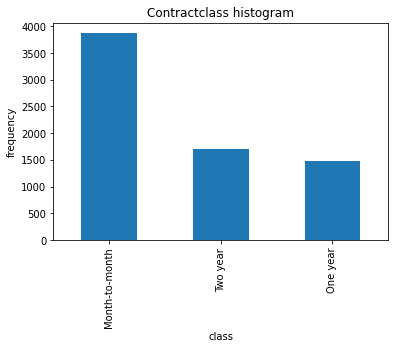

In [24]:
hist_value(df['Contract'])# month to month contract is more likely opted by customers

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


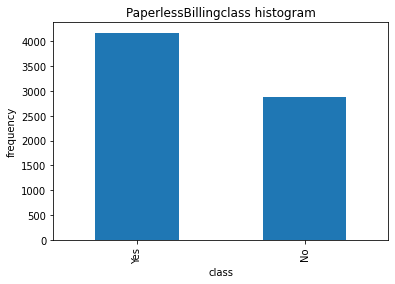

In [25]:
hist_value(df['PaperlessBilling'])# most customers have opted for paperless billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


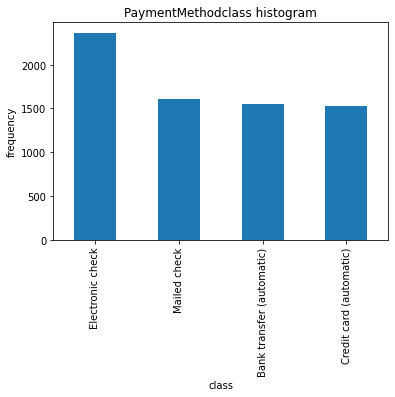

In [26]:
hist_value(df['PaymentMethod'])# electronic checks is more preferable method of payment

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


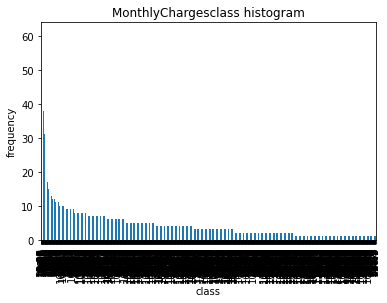

In [27]:
hist_value(df['MonthlyCharges']) # they are not direct factors affectg churn output.

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
260.8       1
260.7       1
2599.95     1
2598.95     1
999.9       1
Name: TotalCharges, Length: 6531, dtype: int64


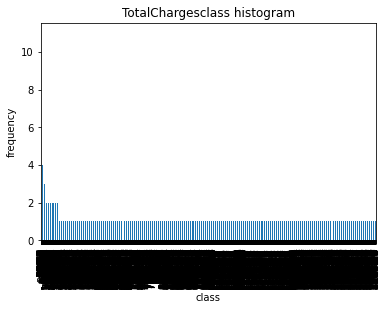

In [28]:
hist_value(df['TotalCharges'])

No     5174
Yes    1869
Name: Churn, dtype: int64


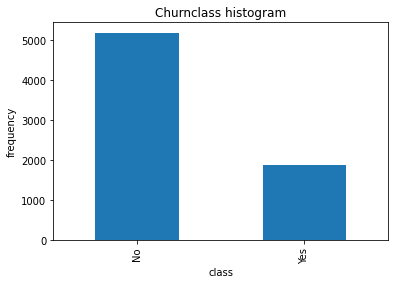

In [29]:
hist_value(df['Churn'])# this is our target variable with majority class being a non churner.we would require to balance these before moving to model building

In [30]:
# Group based analysis
print("male who churned and non churned")
print(df.groupby(['gender']).get_group('Male').Churn.value_counts())


male who churned and non churned
No     2625
Yes     930
Name: Churn, dtype: int64


In [31]:
#female
print('female who churned and non churned')
print(df.groupby(['gender']).get_group('Female').Churn.value_counts())

female who churned and non churned
No     2549
Yes     939
Name: Churn, dtype: int64


In [32]:
#senior citizens
print('senior citizens who churned and non churned')
print(df.groupby(['SeniorCitizen']).get_group(1).Churn.value_counts())

senior citizens who churned and non churned
No     666
Yes    476
Name: Churn, dtype: int64


In [33]:
#non senior citizens
print('non senior citizens who churned and non churned')
print(df.groupby(['SeniorCitizen']).get_group(0).Churn.value_counts())

non senior citizens who churned and non churned
No     4508
Yes    1393
Name: Churn, dtype: int64


In [34]:
#partner
print('partner who are churned and non churned')
print(df.groupby(['Partner']).get_group('Yes').Churn.value_counts())

partner who are churned and non churned
No     2733
Yes     669
Name: Churn, dtype: int64


In [35]:
#non partners
print('non partners who are churned and nonchurned')
print(df.groupby(['Partner']).get_group('No').Churn.value_counts())

non partners who are churned and nonchurned
No     2441
Yes    1200
Name: Churn, dtype: int64


In [36]:
#dependent 
print('dependents who are churned and non churned')
print(df.groupby(['Dependents']).get_group('Yes').Churn.value_counts())

dependents who are churned and non churned
No     1784
Yes     326
Name: Churn, dtype: int64


In [37]:
#non dependent
print('nondependents who are churned and nonchurned')
print(df.groupby(['Dependents']).get_group('No').Churn.value_counts())

nondependents who are churned and nonchurned
No     3390
Yes    1543
Name: Churn, dtype: int64


In [38]:
#with phone service
print('customers with phoneservice who are churned and non churned')
print(df.groupby(['PhoneService']).get_group('Yes').Churn.value_counts())

customers with phoneservice who are churned and non churned
No     4662
Yes    1699
Name: Churn, dtype: int64


In [39]:
#without phone service
print('customers without phoneservice who are churned and nonchurned')
print(df.groupby(['PhoneService']).get_group('No').Churn.value_counts())

customers without phoneservice who are churned and nonchurned
No     512
Yes    170
Name: Churn, dtype: int64


In [40]:
#with multiple lines
print('customers with multiplelines who are churned and nonchurned')
print(df.groupby(['MultipleLines']).get_group('Yes').Churn.value_counts())

customers with multiplelines who are churned and nonchurned
No     2121
Yes     850
Name: Churn, dtype: int64


In [41]:
#without multiple lines
print('customers without multiplelines who are churned and nonchurned')
print(df.groupby(['MultipleLines']).get_group('No').Churn.value_counts())

customers without multiplelines who are churned and nonchurned
No     2541
Yes     849
Name: Churn, dtype: int64


In [42]:
#without phone service in multiplelines column
print('customers without phoneservice who are churned and nonchurned')
print(df.groupby(['MultipleLines']).get_group('No phone service').Churn.value_counts())

customers without phoneservice who are churned and nonchurned
No     512
Yes    170
Name: Churn, dtype: int64


In [43]:
df['InternetService'] # to visualise a column and get the details of that column

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: category
Categories (3, object): ['DSL', 'Fiber optic', 'No']

In [44]:
df.InternetService # same as above (both are same)

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: category
Categories (3, object): ['DSL', 'Fiber optic', 'No']

In [45]:
#customers with dsl internet service
print('customers with dsl service who are churned and nonchurned')
print(df.groupby(['InternetService']).get_group('DSL').Churn.value_counts())

customers with dsl service who are churned and nonchurned
No     1962
Yes     459
Name: Churn, dtype: int64


In [46]:
#customers with fiber optic internet service
print('customers with fiber optic who are churned and nonchurned')
print(df.groupby(['InternetService']).get_group('Fiber optic').Churn.value_counts())

customers with fiber optic who are churned and nonchurned
No     1799
Yes    1297
Name: Churn, dtype: int64


In [47]:
#customers with no internet service
print('customers with no internet service who are churned and nonchurned')
print(df.groupby(['InternetService']).get_group('No').Churn.value_counts())

customers with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [48]:
df.OnlineSecurity

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7043, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [49]:
#customers with online security
print('customers with online security who are churned and nonchurned')
print(df.groupby(['OnlineSecurity']).get_group('Yes').Churn.value_counts())


customers with online security who are churned and nonchurned
No     1724
Yes     295
Name: Churn, dtype: int64


In [50]:
#customers with no online security
print('customers with no online security who are churned and nonchurned')
print(df.groupby(['OnlineSecurity']).get_group('No').Churn.value_counts())

customers with no online security who are churned and nonchurned
No     2037
Yes    1461
Name: Churn, dtype: int64


In [51]:
#customers with no internet service
print('customers with no internet service who are churned and nonchurned')
print(df.groupby(['OnlineSecurity']).get_group('No internet service').Churn.value_counts())

customers with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [52]:
df.DeviceProtection

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [53]:
#customers with deviceprotection
print('customers with device protection who are churned and nonchurned')
print(df.groupby(['DeviceProtection']).get_group('Yes').Churn.value_counts())

customers with device protection who are churned and nonchurned
No     1877
Yes     545
Name: Churn, dtype: int64


In [54]:
#customers with no device protection
print('customers with no device protection who are churned and nonchurned')
print(df.groupby(['DeviceProtection']).get_group('No').Churn.value_counts())

customers with no device protection who are churned and nonchurned
No     1884
Yes    1211
Name: Churn, dtype: int64


In [55]:
#customers with no internet service
print('customers with no internet service who are churned and nonchurned')
print(df.groupby(['DeviceProtection']).get_group('No internet service').Churn.value_counts())

customers with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [56]:
df.TechSupport

0        No
1        No
2        No
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040     No
7041     No
7042    Yes
Name: TechSupport, Length: 7043, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [57]:
#customers with techsupport
print('customers with techsupport who are churned and nonchurned')
print(df.groupby(['TechSupport']).get_group('Yes').Churn.value_counts())

customers with techsupport who are churned and nonchurned
No     1734
Yes     310
Name: Churn, dtype: int64


In [58]:
#customers without techsupport
print('customers without techsupport who are churned and nonchurned')
print(df.groupby(['TechSupport']).get_group('No').Churn.value_counts())

customers without techsupport who are churned and nonchurned
No     2027
Yes    1446
Name: Churn, dtype: int64


In [59]:
#customers with no internet service
print('customers with no internet service who are churned and nonchurned')
print(df.groupby(['TechSupport']).get_group('No internet service').Churn.value_counts())

customers with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [60]:
df.StreamingTV

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingTV, Length: 7043, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [61]:
#customers with streamingTv
print('Customers with streaming tv who are churned and nonchurned')
print(df.groupby(['StreamingTV']).get_group('Yes').Churn.value_counts())

Customers with streaming tv who are churned and nonchurned
No     1893
Yes     814
Name: Churn, dtype: int64


In [62]:
#customers with no streaming tv
print('customers with no streamingtv who are churned and nonchurned')
print(df.groupby(['StreamingTV']).get_group('No').Churn.value_counts())

customers with no streamingtv who are churned and nonchurned
No     1868
Yes     942
Name: Churn, dtype: int64


In [63]:
#customers with no internet service
print('customers with no internet service who are churned and nonchurned')
print(df.groupby(['StreamingTV']).get_group('No internet service').Churn.value_counts())

customers with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [64]:
df.StreamingMovies


0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [65]:
# customers with streamingmovies
print('customers with streaming movies who are churned and nonchurned')
print(df.groupby(['StreamingMovies']).get_group('Yes').Churn.value_counts())

customers with streaming movies who are churned and nonchurned
No     1914
Yes     818
Name: Churn, dtype: int64


In [66]:
#customers with no streaming movies
print('customers with no streamingmovies who are churned and nonchurned')
print(df.groupby(['StreamingMovies']).get_group('No').Churn.value_counts())

customers with no streamingmovies who are churned and nonchurned
No     1847
Yes     938
Name: Churn, dtype: int64


In [67]:
#customer with no internet service
print('customer with no internet service who are churned and nonchurned')
print(df.groupby(['StreamingMovies']).get_group('No internet service').Churn.value_counts())

customer with no internet service who are churned and nonchurned
No     1413
Yes     113
Name: Churn, dtype: int64


In [68]:
df.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: category
Categories (3, object): ['Month-to-month', 'One year', 'Two year']

In [69]:
#customer with month to month contract
print('customers with month to month contract who are churned and nonchurned')
print(df.groupby(['Contract']).get_group('Month-to-month').Churn.value_counts())

customers with month to month contract who are churned and nonchurned
No     2220
Yes    1655
Name: Churn, dtype: int64


In [70]:
#customer with one year contract
print('customers with one year contract who are churned and nonchurned')
print(df.groupby(['Contract']).get_group('One year').Churn.value_counts())

customers with one year contract who are churned and nonchurned
No     1307
Yes     166
Name: Churn, dtype: int64


In [71]:
#customer with two year contract
print('customers with two year contract who are churned and nonchurned')
print(df.groupby(['Contract']).get_group('Two year').Churn.value_counts())

customers with two year contract who are churned and nonchurned
No     1647
Yes      48
Name: Churn, dtype: int64


In [72]:
df.PaperlessBilling

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

In [73]:
#customers with paperless billing
print('customers with paperless billing who are churned and nonchurned')
print(df.groupby(['PaperlessBilling']).get_group('Yes').Churn.value_counts())

customers with paperless billing who are churned and nonchurned
No     2771
Yes    1400
Name: Churn, dtype: int64


In [74]:
#customers with no paperless billing
print('customers with no papaerless billing who are churned and nonchurned')
print(df.groupby(['PaperlessBilling']).get_group('No').Churn.value_counts())

customers with no papaerless billing who are churned and nonchurned
No     2403
Yes     469
Name: Churn, dtype: int64


In [75]:
df.PaymentMethod

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: category
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']

In [76]:
#customers with bank transfer(automatic)payment method
print('customers with automatic bank transfer payment method who are churned and nonchurned')
print(df.groupby(['PaymentMethod']).get_group('Bank transfer (automatic)').Churn.value_counts())

customers with automatic bank transfer payment method who are churned and nonchurned
No     1286
Yes     258
Name: Churn, dtype: int64


In [77]:
#customers with automatic credit card payment method
print('customers with automatic credit card payment method who are churned and nonchurned')
print(df.groupby(['PaymentMethod']).get_group('Credit card (automatic)').Churn.value_counts())

customers with automatic credit card payment method who are churned and nonchurned
No     1290
Yes     232
Name: Churn, dtype: int64


In [78]:
#customers with electronic check payment method
print('customers with electronic check who are churned and nonchurned')
print(df.groupby(['PaymentMethod']).get_group('Electronic check').Churn.value_counts())

customers with electronic check who are churned and nonchurned
No     1294
Yes    1071
Name: Churn, dtype: int64


In [79]:
#customers with Mailed check payment method
print('customers with mailed check payment method who are churned and nonchurned ')
print(df.groupby(['PaymentMethod']).get_group('Mailed check').Churn.value_counts())

customers with mailed check payment method who are churned and nonchurned 
No     1304
Yes     308
Name: Churn, dtype: int64


In [80]:
#one hot Encoding -It is a process of converting categorical variable into a form that machine learning can improve prediction as wellas classification accuracy of model.
#no of columns will b increasing 


In [81]:
replacestruct={"Churn":{"No":0,"Yes":1}}# replacement only.no one hot encoding
onehotcols=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
            "PaperlessBilling","PaymentMethod"]


In [82]:
replacedata=df.replace(replacestruct,inplace=True)# when inplace=true,data is modified inplace and it will return updated dataframe
replacedata=pd.get_dummies(df,columns=onehotcols)# get_dummies is used for data manipulation.it converts categorical data into dummy variable.
#dummy variable is a variable that takes values 0 and 1 where values indicates presence or absence of something.

In [83]:
replacedata.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [84]:
replacedata.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contr

In [85]:
replacedata.shape

(7043, 48)

In [86]:
featurewithblank=[]  # column names are called features,labels are eg.yes,no,no internet service
for feature in replacedata.columns:
  if any(replacedata[feature]== ' '): # after equal to put space 
    featurewithblank.append(feature)
print(featurewithblank)

['TotalCharges']


In [87]:
replacedata[replacedata.TotalCharges== ' '].index #it gives index  for blank value in the feature TotalCharges

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [88]:
#replace blank values with NAN values
replacedata.replace(' ', np.NaN,inplace=True)
replacedata.head(490)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,7971-HLVXI,72,84.50,6130.85,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,0
486,9094-AZPHK,15,100.15,1415,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
487,3649-JPUGY,72,88.60,6201.95,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,0,0
488,4472-LVYGI,0,52.55,NaN,0,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0


In [89]:
print(replacedata[replacedata.TotalCharges== ' '].index)
print(replacedata.TotalCharges.isna().value_counts()) # 11 missing values in output

Int64Index([], dtype='int64')
False    7032
True       11
Name: TotalCharges, dtype: int64


In [90]:
#changing datatype to numeric
replacedata.TotalCharges=pd.to_numeric(replacedata.TotalCharges)
replacedata.TotalCharges.dtype


dtype('float64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


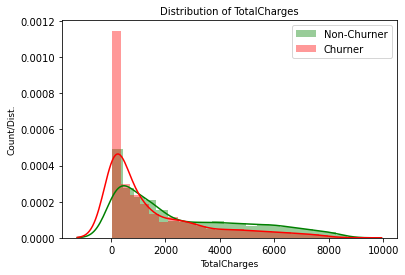

In [91]:
#plotting 
plt2=sns.distplot(replacedata[replacedata.Churn==0][replacedata.TotalCharges.name],color='green',label='Non-Churner')
sns.distplot(replacedata[replacedata.Churn==1][replacedata.TotalCharges.name],color='red',label='Churner')
plt2.set_title('Distribution of '+ replacedata.TotalCharges.name, fontdict={'fontsize':10})
plt2.set_xlabel(replacedata.TotalCharges.name,fontdict={'fontsize':9})
plt2.set_ylabel('Count/Dist.',fontdict={'fontsize':9})
plt2.axes.legend(loc=0)

# we can see that few values are very large so mean will be impacted a lot.we will use median based computation.

In [92]:
median_df=replacedata.groupby('Churn')['TotalCharges'].median()
print(median_df)

Churn
0    1683.60
1     703.55
Name: TotalCharges, dtype: float64


In [93]:
#convert Nan into 0's and 1's
var_0=median_df.iloc[0]
var_1=median_df.iloc[1]
replacedata.loc[(replacedata['Churn'] == 0) & (replacedata['TotalCharges'].isnull()), 'TotalCharges']=var_0 # replacing step..Nan converts to 0
replacedata.loc[(replacedata['Churn'] == 1) & (replacedata['TotalCharges'].isnull()), 'TotalCharges']=var_1 # replacing step..Nan converts to 1
print(replacedata.TotalCharges.isna().value_counts()) # check any null values

False    7043
Name: TotalCharges, dtype: int64


In [94]:
#dropping of columns
replacedata=replacedata.drop('customerID',axis=1)
replacedata.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [95]:
#separating churn
churn=replacedata['Churn']
x=replacedata.drop('Churn',axis=1)

In [96]:
#train and test splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,churn,test_size=0.2,random_state=0)
print("Number Observations in x_train dataset:", x_train.shape)
print("Number Observations in x_test dataset:", x_test.shape)
print("Number Observations in y_train dataset:", y_train.shape)
print("Number Observations in y_test dataset:", y_test.shape)

Number Observations in x_train dataset: (5634, 46)
Number Observations in x_test dataset: (1409, 46)
Number Observations in y_train dataset: (5634,)
Number Observations in y_test dataset: (1409,)


In [97]:
from sklearn.preprocessing import StandardScaler # will change to standard format
scaled_train=StandardScaler().fit_transform(x_train)
scaled_test=StandardScaler().fit_transform(x_test)
# standard scalar standardizes the features by subtracting the mean and then scaling to unit variance. unit variance means dividing all values by std deviation.

In [98]:
from sklearn.preprocessing import MinMaxScaler # minmax scaler preserves the shape of original distribution, it scales all data features in range (0,1).
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
scaled_train=pd.DataFrame(scaler.transform(x_train))
scaler.fit(x_test)
scaled_test=pd.DataFrame(scaler.transform(x_test))
# if there is negative value in the dataset, range of minmax scaler is (-1,1)

In [99]:
#Data Modelling and performance evaluation
#Decision Tree
from sklearn import tree

In [100]:
dt=tree.DecisionTreeClassifier(random_state=9)
dt=dt.fit(x_train,y_train) # model building  and training step by fitting


[Text(0.3495931853458161, 0.98, 'X[37] <= 0.5\ngini = 0.391\nsamples = 5634\nvalue = [4133, 1501]'),
 Text(0.12197554223183278, 0.94, 'X[1] <= 93.675\ngini = 0.119\nsamples = 2521\nvalue = [2361, 160]'),
 Text(0.07081777078828386, 0.9, 'X[19] <= 0.5\ngini = 0.07\nsamples = 1903\nvalue = [1834, 69]'),
 Text(0.04101959242513597, 0.86, 'X[44] <= 0.5\ngini = 0.043\nsamples = 1493\nvalue = [1460, 33]'),
 Text(0.023589541969726756, 0.82, 'X[1] <= 62.675\ngini = 0.035\nsamples = 1362\nvalue = [1338, 24]'),
 Text(0.011794770984863378, 0.78, 'X[2] <= 37.075\ngini = 0.021\nsamples = 949\nvalue = [939, 10]'),
 Text(0.009697922809776554, 0.74, 'X[2] <= 35.35\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.008649498722233143, 0.7, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.010746346897319965, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0138916191599502, 0.74, 'X[0] <= 59.5\ngini = 0.019\nsamples = 942\nvalue = [933, 9]'),
 Text(0.012843195072406789, 0.7, 'X[0] <= 52.5\ng

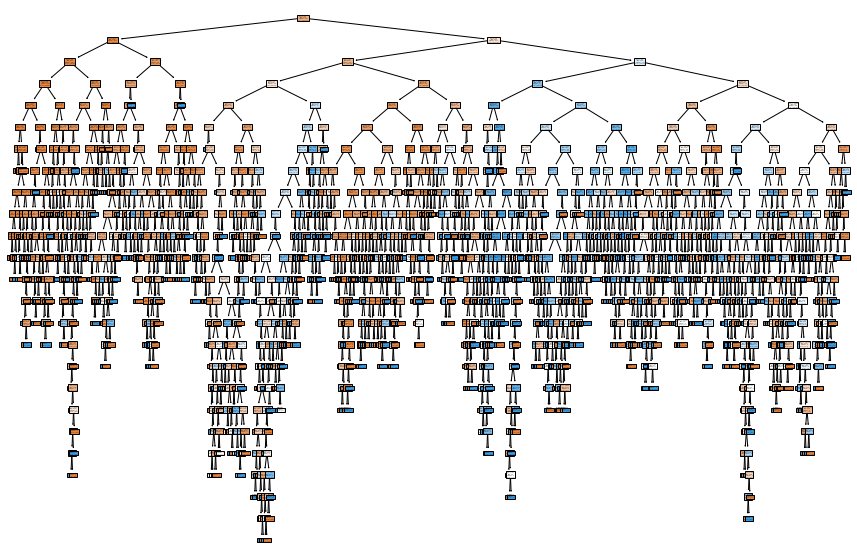

In [101]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True) # plotting step

In [102]:
#performance of decision tree
#confusion matrix is a summary of prediction results on classification problem
# it is tabular structure 2 rows 2 columns
#true-positive, false-positive
#false-negative, true-negative


#confusion matrix of training data
from sklearn.metrics import confusion_matrix
pred=dt.predict(scaled_train)
confusion_matrix(y_train,pred)
pd.crosstab(y_train,pred,rownames=['True'],colnames=['Predicted'],margins=True)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Predicted,0,1,All
True,,,
0,2827,1306,4133
1,423,1078,1501
All,3250,2384,5634


In [103]:
#confusion matrix of testing data
from sklearn.metrics import confusion_matrix
pred1=dt.predict(scaled_test)
confusion_matrix(y_test,pred1)
pd.crosstab(y_test,pred1,rownames=['True'],colnames=['Predicted'],margins=True)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Predicted,0,1,All
True,,,
0,726,315,1041
1,125,243,368
All,851,558,1409


In [104]:
acc_dt = round(dt.score(x_test, y_test) * 100, 2)

In [105]:
acc_dt

72.53

In [106]:
# model 2- KNN- K nearest Neighbors
#prediction for optimum k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=[]
accuracy=[]
for i in range(1,40,2): # i is k no of neighbors # taking random numbers with 2 as step size
  knn=KNeighborsClassifier(n_neighbors=i)
  #fitting model with k=1,3,5.....39 on x_train_knn
  knn.fit(scaled_train,y_train) # always  fitting training data

  pred=knn.predict(scaled_test) # prediction for  test data
  k.append(i)
  acc=accuracy_score(y_test,pred,normalize=True)*(100)
  accuracy.append(acc)
  #evaluating accuracy
  print("\n CV k,accuracy",(i,acc)) # cv is cross validation


 CV k,accuracy (1, 69.83676366217175)

 CV k,accuracy (3, 73.59829666430092)

 CV k,accuracy (5, 74.30801987224982)

 CV k,accuracy (7, 75.30163236337827)

 CV k,accuracy (9, 75.8694109297374)

 CV k,accuracy (11, 76.86302342086586)

 CV k,accuracy (13, 77.71469127040454)

 CV k,accuracy (15, 77.92760823278921)

 CV k,accuracy (17, 78.63733144073811)

 CV k,accuracy (19, 78.708303761533)

 CV k,accuracy (21, 78.35344215755855)

 CV k,accuracy (23, 78.28246983676365)

 CV k,accuracy (25, 78.42441447835344)

 CV k,accuracy (27, 78.21149751596877)

 CV k,accuracy (29, 77.9985805535841)

 CV k,accuracy (31, 77.9985805535841)

 CV k,accuracy (33, 77.64371894960965)

 CV k,accuracy (35, 77.85663591199432)

 CV k,accuracy (37, 78.06955287437899)

 CV k,accuracy (39, 78.35344215755855)


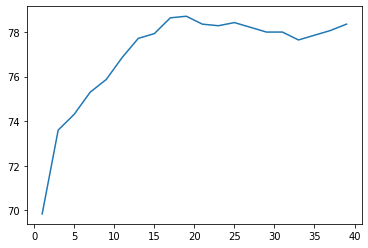

In [107]:
plt.plot(k,accuracy)
# for k=19,17,39 we are getting good scores on test data


In [108]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(scaled_train,y_train)
pred=knn.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test,pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,908,133,1041
1,167,201,368
All,1075,334,1409


In [109]:
#model 3- SVM

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid={'C':[0.1,1,10,100,1000], # larger value of c means margin is smaller and low value of c means margin is larger, values are random
            'gamma':[1,0.1,0.01,0.001], # gamma defined influence of single training examples, low value means far, high value means close
            'kernel':['rbf']} # radial basis functional -rbf place a rbf kernel centered at each pt ,then perform linear manipulation to map to higher dimensional spaces,
                              # that are easier to separate.

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

#gridsearchCV is a technique to search through best parameter values,basically it is a crossvalidation.Best parameter values are extracted and then parameters are made
#Here gridsearchCV tries all combination of values passed in dictionary and evaluate the model

#fitting the model for grid search
grid.fit(scaled_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   1.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   1.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.736 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [110]:
print(grid.best_estimator_)
#we are getting these as best parameters

SVC(C=1000, gamma=0.001)


In [111]:

grid_predictions=grid.predict(scaled_test)
confusion_matrix(y_test,grid_predictions)
pd.crosstab(y_test,grid_predictions,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,947,94,1041
1,188,180,368
All,1135,274,1409


In [114]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(max_iter=500) # denotes  max no of iterations taken  to solve problem.
lr1.fit(scaled_train,y_train)



LogisticRegression(max_iter=500)

In [115]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test,pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,934,107,1041
1,175,193,368
All,1109,300,1409


In [116]:
#Random forest
from sklearn.ensemble import RandomForestClassifier # random forest is ensemble model, means collection of decision trees
forest=RandomForestClassifier(random_state=9)
modelF=forest.fit(scaled_train,y_train)
pred=modelF.predict(scaled_test)

In [117]:
confusion_matrix(y_test,pred)
pd.crosstab(y_test,pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,919,122,1041
1,202,166,368
All,1121,288,1409


In [119]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(random_state=9) # classifier calling step. its related to random forest, we want to take random nos, ie y random_state=9
ada_clf.fit(scaled_train,y_train)
pred=ada_clf.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test,pred,rownames=['True'],colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,922,119,1041
1,177,191,368
All,1099,310,1409


In [120]:
#Xgboost-Gradient boosting algorithm
#Xgboost is not in sklearn library,inbuilt stored in Xgboost module library
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(scaled_train,y_train)
pred1=xgb_model.predict(scaled_test)
confusion_matrix(y_test,pred1)
pd.crosstab(y_test,pred1,rownames=['True'],colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,933,108,1041
1,190,178,368
All,1123,286,1409


In [ ]:
#3 models gives corect predictions
#logistic regression
#knn
#adaboost
#select best model  comparing values in confusion matrix.if values of true-postive and true-neagative is high ,this is the best model ie means 0-0 and 1-1


In [122]:
#download our selected model. -downlading best model into our drive
# all Ml models are downloading by same step below
#pickle is python tool used to save pretrained ML models

import pickle
#Lets dump our Adaboost model
pickle.dump(ada_clf,open('adaboost.pkl','wb'))

 # pkl is pickle file,dump is keyword used, arguments are variable names. wb is python file handling  step-writing binary mode